In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
import nltk
plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')

In [2]:
videos_stats = pd.read_csv("videos-stats.csv")
comments = pd.read_csv("comments.csv")

In [3]:
videos_stats.drop_duplicates(subset='Video ID', ignore_index=True, inplace=True)


videos_stats.drop(columns="Unnamed: 0", inplace=True)
comments.drop(columns="Unnamed: 0", inplace=True)

In [4]:
comments.head()

,Video ID,Comment,Likes,Sentiment
0,wAZZ-UWGVHI,Let's not forget that Apple Pay in 2014 requir...,95.0,1.0
1,wAZZ-UWGVHI,Here in NZ 50% of retailers don’t even have co...,19.0,0.0
2,wAZZ-UWGVHI,I will forever acknowledge this channel with t...,161.0,2.0
3,wAZZ-UWGVHI,Whenever I go to a place that doesn’t take App...,8.0,0.0
4,wAZZ-UWGVHI,"Apple Pay is so convenient, secure, and easy t...",34.0,2.0


In [5]:
comments=comments.drop(columns=['Likes'])

In [6]:
videos_stats.head()

,Title,Video ID,Published At,Keyword,Likes,Comments,Views
0,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,2022-08-23,tech,3407.0,672.0,135612.0
1,The most EXPENSIVE thing I own.,b3x28s61q3c,2022-08-24,tech,76779.0,4306.0,1758063.0
2,My New House Gaming Setup is SICK!,4mgePWWCAmA,2022-08-23,tech,63825.0,3338.0,1564007.0
3,Petrol Vs Liquid Nitrogen | Freezing Experimen...,kXiYSI7H2b0,2022-08-23,tech,71566.0,1426.0,922918.0
4,Best Back to School Tech 2022!,ErMwWXQxHp0,2022-08-08,tech,96513.0,5155.0,1855644.0


In [7]:
##show the density of data

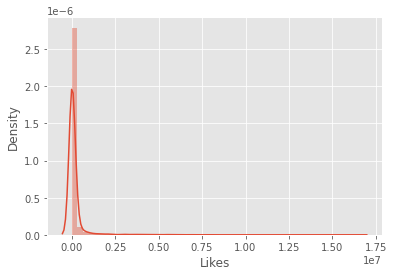

In [8]:
sns.distplot(videos_stats['Likes'])
plt.show()

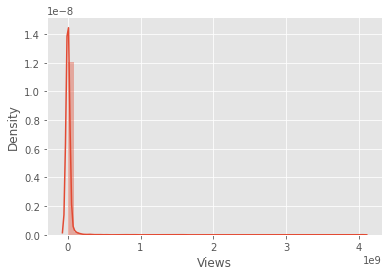

In [9]:
sns.distplot(videos_stats['Views'])
plt.show()

In [10]:
##Delet invaid data

In [11]:
comments=pd.merge(comments,videos_stats,on='Video ID')

In [12]:
comments=comments.dropna()

In [13]:
comments=comments.sample(len(comments))

In [14]:
comments.isnull().sum()

Video ID        0
Comment         0
Sentiment       0
Title           0
Published At    0
Keyword         0
Likes           0
Comments        0
Views           0
dtype: int64

In [15]:
comments.dropna(inplace=True)

In [16]:
##process the embalanced data with Quadrature

In [17]:
Q1=comments.quantile(0.25)
Q3=comments.quantile(0.75)

In [18]:
IQR=Q3-Q1
comments=comments[~((comments<(Q1-1.5*IQR))|(comments>(Q3+1.5*IQR))).any(axis=1)]

In [19]:
comments=comments[comments['Likes']>0]

In [20]:
comments=comments[comments['Views']>0]

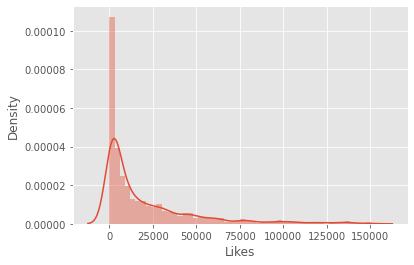

In [21]:
sns.distplot(comments['Likes'])
plt.show()

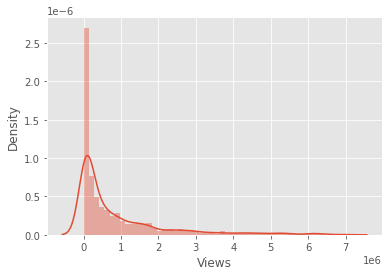

In [22]:
sns.distplot(comments['Views'])
plt.show()

In [23]:
##Text processing（remove the stopwords with nltk，and separat the world with " "

In [24]:
labels = np.array(comments['Sentiment'])
comment = list(comments['Comment'])

In [25]:
def filter_stopwords(sentences):
    filtered_sentences = []
    stopwords = nltk.corpus.stopwords.words('english')
    for s in sentences:
        filtered_sentence = [w for w in s.split() if w not in stopwords]
        filtered_sentences.append(' '.join(filtered_sentence))
    return filtered_sentences

In [26]:
comment = filter_stopwords(comment)

In [27]:
##set up the training set and test set

In [28]:
##Take the first 10,000 data as the training set

In [29]:
n=10000

In [30]:
comment_test=comments.iloc[n:]

In [31]:
comment_test.drop(columns="Sentiment", inplace=True)

In [32]:
X_train, X_test, Y_train, Y_test = comment[:n],comment[n:],labels[:n],labels[n:]

In [33]:
##turn the text part into tfidf matrix

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_transformer = TfidfVectorizer()
tf_train_data = tfidf_transformer.fit_transform(X_train)
tf_docs_new = tfidf_transformer.transform(X_test)

In [35]:
tf_train_data

<10000x25962 sparse matrix of type '<class 'numpy.float64'>'
	with 184625 stored elements in Compressed Sparse Row format>

In [36]:
##train data with RF

In [42]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

In [43]:
clf.fit(tf_train_data, Y_train)

RandomForestClassifier()

In [44]:
comment_test

,Video ID,Comment,Title,Published At,Keyword,Likes,Comments,Views
1421,jzJW0gTYB9k,Ricardo was playing for Portugal on the Eurocu...,Impossible Sports Moments,2022-02-22,sports,22479.0,299.0,2020370.0
11037,7jUW96CiEKA,Documentaries of all kinds literally never fai...,Wild Life - Nature Documentary Full HD 1080p,2020-09-21,animals,9313.0,433.0,1722365.0
8302,6jvrAjL3JnA,Great content Celaine. Keep up the good work. 💯💯,ASMR ALIEN FULL BODY EXAM DETAILED Medical Rol...,2022-08-24,asmr,4512.0,349.0,116672.0
15817,60zVVNU_Jvw,"""Little does he know it takes an hour for full...",Reloading a Controller: Xbox vs. Playstation,2022-08-23,xbox,1781.0,66.0,33246.0
1757,RIbMoJouce8,“Correcting gods mistake one bullet at a time”...,How to Beat the SMART FISH in COLD SKIN,2022-08-23,how-to,14408.0,864.0,275924.0
...,...,...,...,...,...,...,...,...
16091,8Ltc-BfxBhY,Gorr น่าจะมีฟอร์ม 2แบบ ร่างปกติกับร่างพลังจากด...,Marvel Studios&#39; Thor: Love and Thunder ธอร...,2022-05-24,marvel,8870.0,554.0,834400.0
10155,OOmBqTAp1TU,I liked that they showed Daemon crying at The ...,HOUSE OF THE DRAGON | EPISODE 1 THE HEIRS OF T...,2022-08-23,reaction,670.0,125.0,10451.0
15116,I0wIauQ0wMs,Well-worded and gracefully honest! It does lik...,We&#39;ve Played Splatoon 3 - Is It Any Good?,2022-08-24,nintendo,2677.0,390.0,51017.0
14345,aXg3edeUrtc,Outstanding lecture. Interesting and fun. Than...,Physics experiments that changed the world – w...,2022-08-11,physics,2012.0,143.0,72517.0


In [45]:
acc=clf.score(tf_docs_new,Y_test)

In [46]:
##print accuracy
print(acc)

0.7020517395182873


In [47]:
##train data with MLP

In [48]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier()

In [49]:
clf.fit(tf_train_data, Y_train)

MLPClassifier()

In [50]:
comment_test

,Video ID,Comment,Title,Published At,Keyword,Likes,Comments,Views
1421,jzJW0gTYB9k,Ricardo was playing for Portugal on the Eurocu...,Impossible Sports Moments,2022-02-22,sports,22479.0,299.0,2020370.0
11037,7jUW96CiEKA,Documentaries of all kinds literally never fai...,Wild Life - Nature Documentary Full HD 1080p,2020-09-21,animals,9313.0,433.0,1722365.0
8302,6jvrAjL3JnA,Great content Celaine. Keep up the good work. 💯💯,ASMR ALIEN FULL BODY EXAM DETAILED Medical Rol...,2022-08-24,asmr,4512.0,349.0,116672.0
15817,60zVVNU_Jvw,"""Little does he know it takes an hour for full...",Reloading a Controller: Xbox vs. Playstation,2022-08-23,xbox,1781.0,66.0,33246.0
1757,RIbMoJouce8,“Correcting gods mistake one bullet at a time”...,How to Beat the SMART FISH in COLD SKIN,2022-08-23,how-to,14408.0,864.0,275924.0
...,...,...,...,...,...,...,...,...
16091,8Ltc-BfxBhY,Gorr น่าจะมีฟอร์ม 2แบบ ร่างปกติกับร่างพลังจากด...,Marvel Studios&#39; Thor: Love and Thunder ธอร...,2022-05-24,marvel,8870.0,554.0,834400.0
10155,OOmBqTAp1TU,I liked that they showed Daemon crying at The ...,HOUSE OF THE DRAGON | EPISODE 1 THE HEIRS OF T...,2022-08-23,reaction,670.0,125.0,10451.0
15116,I0wIauQ0wMs,Well-worded and gracefully honest! It does lik...,We&#39;ve Played Splatoon 3 - Is It Any Good?,2022-08-24,nintendo,2677.0,390.0,51017.0
14345,aXg3edeUrtc,Outstanding lecture. Interesting and fun. Than...,Physics experiments that changed the world – w...,2022-08-11,physics,2012.0,143.0,72517.0


In [51]:
acc=clf.score(tf_docs_new,Y_test)

In [52]:
##print accuracy

In [53]:
print(acc)

0.7305976806422837


In [54]:
ypre=clf.predict(tf_docs_new)

In [55]:
comment_test['Sentiment']=ypre

In [56]:
comment_test

,Video ID,Comment,Title,Published At,Keyword,Likes,Comments,Views,Sentiment
1421,jzJW0gTYB9k,Ricardo was playing for Portugal on the Eurocu...,Impossible Sports Moments,2022-02-22,sports,22479.0,299.0,2020370.0,2.0
11037,7jUW96CiEKA,Documentaries of all kinds literally never fai...,Wild Life - Nature Documentary Full HD 1080p,2020-09-21,animals,9313.0,433.0,1722365.0,2.0
8302,6jvrAjL3JnA,Great content Celaine. Keep up the good work. 💯💯,ASMR ALIEN FULL BODY EXAM DETAILED Medical Rol...,2022-08-24,asmr,4512.0,349.0,116672.0,2.0
15817,60zVVNU_Jvw,"""Little does he know it takes an hour for full...",Reloading a Controller: Xbox vs. Playstation,2022-08-23,xbox,1781.0,66.0,33246.0,1.0
1757,RIbMoJouce8,“Correcting gods mistake one bullet at a time”...,How to Beat the SMART FISH in COLD SKIN,2022-08-23,how-to,14408.0,864.0,275924.0,2.0
...,...,...,...,...,...,...,...,...,...
16091,8Ltc-BfxBhY,Gorr น่าจะมีฟอร์ม 2แบบ ร่างปกติกับร่างพลังจากด...,Marvel Studios&#39; Thor: Love and Thunder ธอร...,2022-05-24,marvel,8870.0,554.0,834400.0,2.0
10155,OOmBqTAp1TU,I liked that they showed Daemon crying at The ...,HOUSE OF THE DRAGON | EPISODE 1 THE HEIRS OF T...,2022-08-23,reaction,670.0,125.0,10451.0,2.0
15116,I0wIauQ0wMs,Well-worded and gracefully honest! It does lik...,We&#39;ve Played Splatoon 3 - Is It Any Good?,2022-08-24,nintendo,2677.0,390.0,51017.0,2.0
14345,aXg3edeUrtc,Outstanding lecture. Interesting and fun. Than...,Physics experiments that changed the world – w...,2022-08-11,physics,2012.0,143.0,72517.0,2.0


In [57]:
res=comment_test.groupby('Video ID')['Likes','Views','Sentiment'].agg(['mean'])

In [58]:
res

,Likes,Views,Sentiment
,mean,mean,mean
Video ID,,,
--hxd1CrOqg,6379.0,808787.0,0.000000
--ixiTypG8g,1029.0,97434.0,0.833333
-6IgkG5yZfo,10959.0,844015.0,1.500000
-7hzaGya86g,18957.0,702174.0,1.666667
-8TnsjDRXUE,3232.0,188875.0,2.000000
...,...,...,...
zhUnEg0he4A,39868.0,2797148.0,1.000000
zpYdgUoitd4,34514.0,1469736.0,0.666667


In [59]:
res.corr()

,,Likes,Views,Sentiment
,,mean,mean,mean
Likes,mean,1.000000,0.783390,0.051026
Views,mean,0.783390,1.000000,0.050931
Sentiment,mean,0.051026,0.050931,1.000000


In [60]:
res.columns=['Likes','Views','Sentiment']

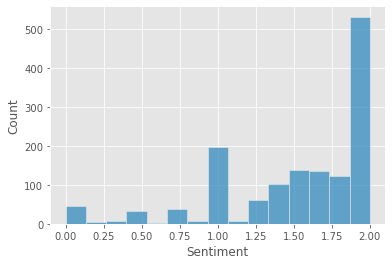

In [61]:
sns.histplot(res['Sentiment'])
plt.show()

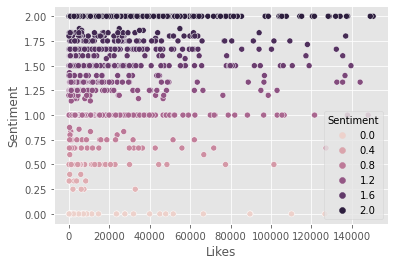

In [62]:
sns.scatterplot(data=res,x='Likes',y='Sentiment',hue='Sentiment')
plt.show()

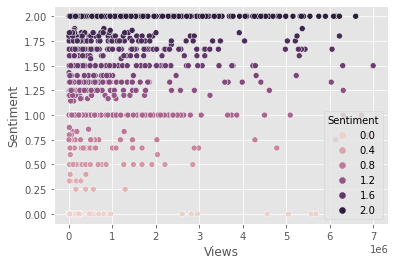

In [63]:
sns.scatterplot(data=res,x='Views',y='Sentiment',hue='Sentiment')
plt.show()

In [64]:
res

,Likes,Views,Sentiment
Video ID,,,
--hxd1CrOqg,6379.0,808787.0,0.000000
--ixiTypG8g,1029.0,97434.0,0.833333
-6IgkG5yZfo,10959.0,844015.0,1.500000
-7hzaGya86g,18957.0,702174.0,1.666667
-8TnsjDRXUE,3232.0,188875.0,2.000000
...,...,...,...
zhUnEg0he4A,39868.0,2797148.0,1.000000
zpYdgUoitd4,34514.0,1469736.0,0.666667
zukfAqA_X4U,10725.0,155562.0,2.000000


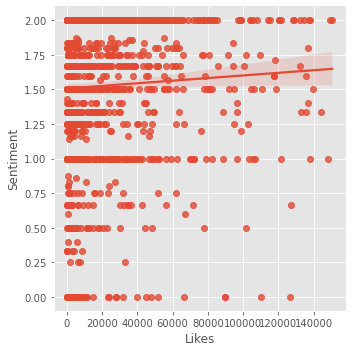

In [65]:
sns.lmplot(data=res,x='Likes',y='Sentiment')

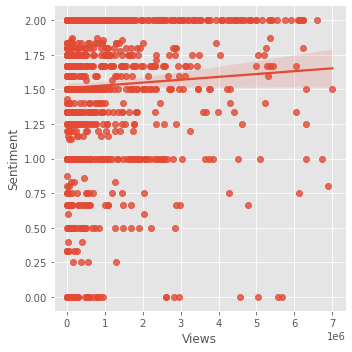

In [66]:
sns.lmplot(data=res,x='Views',y='Sentiment')

In [67]:
##Created a feature called like_ratio to represent the number of likes per 1000 views.

In [68]:
res.reset_index(inplace=True)
res['like_ratio'] = 1000 * (videos_stats['Likes'] / videos_stats['Views'])

<AxesSubplot:xlabel='Sentiment', ylabel='like_ratio'>

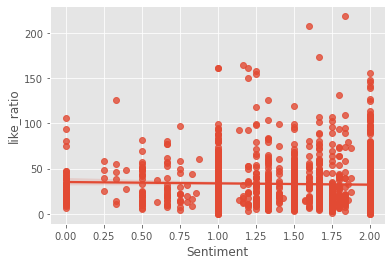

In [69]:
sns.regplot(data=res, x='Sentiment', y='like_ratio')

In [70]:
res

,Video ID,Likes,Views,Sentiment,like_ratio
0,--hxd1CrOqg,6379.0,808787.0,0.000000,25.123145
1,--ixiTypG8g,1029.0,97434.0,0.833333,43.672496
2,-6IgkG5yZfo,10959.0,844015.0,1.500000,40.808641
3,-7hzaGya86g,18957.0,702174.0,1.666667,77.543184
4,-8TnsjDRXUE,3232.0,188875.0,2.000000,52.010515
...,...,...,...,...,...
1423,zhUnEg0he4A,39868.0,2797148.0,1.000000,46.847556
1424,zpYdgUoitd4,34514.0,1469736.0,0.666667,9.886998
1425,zukfAqA_X4U,10725.0,155562.0,2.000000,7.462821
1426,zvS8Fmxv1_U,1167.0,235019.0,1.333333,9.486141


In [71]:
res.corr()

,Likes,Views,Sentiment,like_ratio
Likes,1.000000,0.783390,0.051026,0.004795
Views,0.783390,1.000000,0.050931,-0.020505
Sentiment,0.051026,0.050931,1.000000,-0.028420
like_ratio,0.004795,-0.020505,-0.028420,1.000000
